# Random Forest! :D

### Preprocessing data

In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

from sklearn import preprocessing

In [2]:
rater_df = pd.read_csv("JokeRater.csv")
rating_df = pd.read_csv("JokeRating.csv")
joke_df = pd.read_csv("Joke.csv")

Looking at the CSVs.

In [9]:
rater_df.head()

,joke_rater_id,joke_submitter_id,gender,age,birth_country,major,preferred_joke_genre,preferred_joke_genre2,preferred_joke_type,favorite_music_genre,favorite_movie_genre
0,453,17395,Male,20,United States,Computer Science/CSE,Nerd,School,Puns,Hip-Hop,Comedy
1,454,lois,Female,25,China,Physics,Animal,Math,Punch line,Pop,SciFi
2,455,aawhoo,Male,21,United States,Computer Science/CSE,Programming,Animal,Puns,Jazz,Thriller
3,456,12378954,Male,22,United States,Computer Science/CSE,Nerd,Programming,Question,Hip-Hop,SciFi
4,457,22118,Male,23,United States,Computer Science/CSE,Nerd,Programming,Puns,Alternative Rock,SciFi


In [3]:
rater_df.rename(columns = {'id':'joke_rater_id'}, inplace = True)
joke_df.rename(columns = {'id':'joke_id'}, inplace = True)
joke_df['joke_id'] = joke_df['joke_id'].astype(float)
rater_df = rater_df.drop('joke_submitter_id', axis=1)
joke_df = joke_df.drop('joke_submitter_id', axis=1)
joke_df = joke_df.drop('joke_source', axis=1)

In [5]:
rating_df.head()

,id,rating,joke_id,joke_rater_id
0,43303,5,527,480
1,43304,1,592,480
2,43305,5,552,480
3,43306,5,588,480
4,43307,4,589,480


In [11]:
joke_df.head()

,id,category,joke_type,subject,joke_text,joke_submitter_id,joke_source
0,505,Sports,pun,Tennis,Why don’t fish play tennis? Because they're af...,NaN,D94
1,506,Programming,One-liner,Recursion,"To understand what recursion is, you must firs...",496.0,C37
2,507,Other,Punch-line,Onions,A lot of people cry when cutting onions. The t...,533.0,C75
3,508,Lawyer,punch line,east coast,Why does New Jersey have so many toxic waste d...,NaN,D80
4,509,School,One-liner,school,I start studying when my coffee starts kicking...,468.0,C11


Joining databases together all into one. M E R G E T I M E

In [32]:
df = pd.merge(rating_df, rater_df, on="joke_rater_id", how="outer")
df = df.drop('id', axis=1)

df = pd.merge(df, joke_df, on='joke_id', how='outer')
df.head()

,rating,joke_id,joke_rater_id,gender,age,birth_country,major,preferred_joke_genre,preferred_joke_genre2,preferred_joke_type,favorite_music_genre,favorite_movie_genre,category,joke_type,subject,joke_text
0,5.0,527.0,480,Female,24,Taiwan,Statistics,Math,Programming,Question,Rock,Horror,School,Question,cheerleaders,What did the cheerleader say when she was give...
1,4.0,527.0,503,Female,21,Taiwan,Computer Science/CSE,Programming,School,Pick-up Line,Hip-Hop,Thriller,School,Question,cheerleaders,What did the cheerleader say when she was give...
2,2.0,527.0,476,Male,23,United States,Computer Science/CSE,Nerd,Programming,One-Liner,Rock,SciFi,School,Question,cheerleaders,What did the cheerleader say when she was give...
3,1.0,527.0,462,Male,26,United States,Statistics,Programming,Math,Puns,Hip-Hop,Documentary,School,Question,cheerleaders,What did the cheerleader say when she was give...
4,2.0,527.0,547,Male,30,United States,Statistics,Other,Politics,Dialogue,Rap,Comedy,School,Question,cheerleaders,What did the cheerleader say when she was give...


#### Deal with NA's.

In [10]:
df.shape

(14338, 16)

In [9]:
df.shape[0] - df.dropna().shape[0]

2104

In [17]:
sum(df.isnull().sum(axis=1) > 2)

343

In [19]:
df[df.isnull().sum(axis=1) > 2].index

Int64Index([   13,    69,   107,   165,   203,   259,   296,   349,   387,
              443,
            ...
            14328, 14329, 14330, 14331, 14332, 14333, 14334, 14335, 14336,
            14337],
           dtype='int64', length=343)

In [33]:
which_drop = df[df.isnull().sum(axis=1) > 2].index
new_df = df.drop(which_drop)
#new_df.isnull().sum()

Replace NaN categories by Mode.

In [34]:
modes = new_df.mode()
new_df.birth_country = new_df.birth_country.fillna("United States")
new_df.preferred_joke_type = new_df.preferred_joke_type.fillna("Puns")
new_df.preferred_joke_genre2 = new_df.preferred_joke_genre.fillna("Programming")
new_df.isnull().sum()

rating                     0
joke_id                    0
joke_rater_id              0
gender                     0
age                        0
birth_country              0
major                      0
preferred_joke_genre       0
preferred_joke_genre2      0
preferred_joke_type        0
favorite_music_genre       0
favorite_movie_genre       0
category                   0
joke_type                 88
subject                  174
joke_text                  0
dtype: int64

Joke subject should be taken care of from the Features team.

Found that Joke Type is null for the same joke. Remove those jokes.

In [35]:
new_df[new_df.joke_type.isnull() == True].index

Int64Index([8906, 8907, 8908, 8909, 8910, 8911, 8912, 8913, 8914, 8915, 8916,
            8917, 8918, 8920, 8921, 8922, 8923, 8924, 8925, 8926, 8927, 8928,
            8929, 8930, 8931, 8932, 8933, 8934, 8935, 8936, 8937, 8938, 8940,
            8941, 8942, 8943, 8944, 8945, 8946, 8947, 8949, 8950, 8951, 8952,
            8954, 8955, 8956, 8957, 8958, 8959, 8960, 8961, 8962, 8963, 8964,
            8965, 8966, 8967, 8968, 8969, 8970, 8971, 8972, 8973, 8974, 8975,
            8977, 8978, 8979, 8980, 8981, 8982, 8983, 8984, 8986, 8987, 8988,
            8989, 8990, 8991, 8992, 8993, 8994, 8995, 8997, 8998, 8999, 9000],
           dtype='int64')

In [37]:
new_df = new_df.drop(new_df[new_df.joke_type.isnull() == True].index)
new_df.subject = new_df.subject.fillna('0')

In [109]:
## IGNORE FOR NOW

def string_to_label(series):
    # code strings into integers to feed into one-hot encoder
    enc = preprocessing.LabelEncoder()
    enc.fit(series)
    new_series = enc.transform(series)
    
    return new_series

def convert_one_hot(series):
    # convert label to one-hot
    encoder = preprocessing.OneHotEncoder(sparse=False)
    encoder.fit(series)
    one_hot = encoder.transform(series)
    return one_hot


# don't use encoding anymore
for i in string_col:
    new_df.iloc[:,i] = string_to_label(new_df.iloc[:,i])
    #new_df.iloc[:,i] = convert_one_hot(new_df.iloc[:,i])

In [38]:
string_col = [3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
#new_df.iloc[:,string_col] = pd.get_dummies(new_df.iloc[:,string_col])

In [9]:
not_string = []
for i in range(16):
    if i not in string_col:
        not_string.append(i)

In [36]:
# ignore for now
from sklearn.decomposition import PCA
pca = PCA(n_components=(8*6 + 3))
X = pd.get_dummies(new_df.iloc[:,string_col])
pca.fit(X)
ar = pca.explained_variance_ratio_
print(np.cumsum(ar))
reduced_dummies = pca.fit_transform(X) # reduced from 106 to 51

[ 0.08994325  0.15854519  0.21172696  0.25856552  0.30216484  0.33947001
  0.37294185  0.40281283  0.43221501  0.46037925  0.48821325  0.5149773
  0.54029729  0.56270698  0.58503571  0.60565322  0.62559617  0.64530512
  0.66362641  0.68152021  0.69837124  0.71434874  0.72991044  0.74501431
  0.75907251  0.77222244  0.7837395   0.79503195  0.805829    0.81586818
  0.82558837  0.8345564   0.84339268  0.85176975  0.85948096  0.86705236
  0.87428693  0.88125452  0.88818648  0.89507541  0.90147443  0.90753654
  0.91325158  0.91876584  0.92408241  0.92887976  0.93346654  0.93797597
  0.94218894  0.94621605  0.95015725]


In [40]:
new_df2 = pd.concat([new_df.iloc[:,not_string], pd.get_dummies(new_df.iloc[:,string_col])], axis=1)

### Random Forest implementation

In [42]:
y = new_df2.rating
Y_list = list(y.values)
cols = [i for j in (range(3, 4), range(6, 112)) for i in j] # excluding text, subject, and ID's
features = new_df2.columns[cols]

rf = RandomForestRegressor()
rf.fit(new_df2[features], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
# predicting on the SAME data, just to test it out
rf.predict(new_df2[features]).astype('float')

array([ 5.        ,  4.6       ,  2.53166667, ...,  2.74027778,
        2.08031746,  3.32797619])

In [58]:
def mse(predicted, real):
    real = np.array(real)
    predicted = np.array(predicted)
    temp =  (real - predicted) * (real - predicted)
    mse = 0.5 * sum(temp)
    return mse

In [59]:
mse(y, rf.predict(new_df2[features]).astype('float'))

4770.1821673622535

Time to do some training and testing split.

In [61]:
import sklearn.model_selection

X = new_df2[features]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

<b>Regression on the Training/Test data</b>

In [93]:
rf2 = RandomForestRegressor(n_estimators=30, max_features='sqrt', random_state=42, max_depth=15)
rf2.fit(X_train, list(y_train))

rf2.predict(X_test).astype('float')
mse(y_test, rf2.predict(X_test).astype('float'))

2690.1267673018529

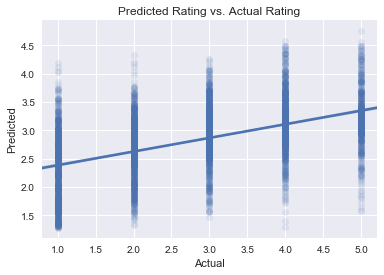

In [107]:
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
ax = sns.regplot(x=y_test, y=rf2.predict(X_test).astype('float'), scatter_kws={'alpha':0.1})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted Rating vs. Actual Rating")
plt.show()

In [67]:
# see what factors are most important
s = pd.DataFrame((rf2.feature_importances_))

In [68]:
s = s.transpose()
s.columns = features
s = s.transpose()

In [75]:
s.sort_values(by=0, ascending=False) # lots of programming jokes and people who liked programming

,0
age,0.060771
category_Programming,0.034482
joke_type_One-liner,0.031600
joke_type_Question,0.030016
joke_type_Pun,0.028311
joke_type_pun,0.025327
category_Other,0.025174
joke_type_Dialogue,0.024713
category_Math,0.024648
category_Animal,0.023490


2666.25834457


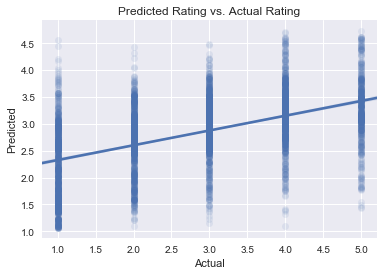

In [124]:
# using label encoding instead -- is not technically right since there's correlation between numerical encoding and regression
y = new_df.rating
Y_list = list(y.values)
cols = range(3, 14) # excluding text, subject, and ID's
features = new_df.columns[cols]

X = new_df[features]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

rf3 = RandomForestRegressor(n_estimators=50, max_features='auto', random_state=42, max_depth=10)
rf3.fit(X_train, list(y_train))

rf3.predict(X_test).astype('float')
print(mse(y_test, rf3.predict(X_test).astype('float')))
ax2 = sns.regplot(x=y_test, y=rf3.predict(X_test).astype('float'), scatter_kws={'alpha':0.1})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted Rating vs. Actual Rating")
plt.show()